# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import __version__
print(__version__)

4.14.3


In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
score = pd.read_csv('/Users/anya/Downloads/StudentsPerformance (2).csv')

In [5]:
score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


This allows us to get the first five rows of the dataset.

In [6]:
score.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The describe method quicklly/easily gives us the mean, median, 1st quartile, 3rd quartile, max, min, standard
deviation, and the count of the data.

In [7]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Exploratory Data Analysis (EDA)

By doing a quick data analysis on this dataset, we can find trends and patterns in the data that can help us
find the predicted score at the end. 

In [8]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='gender', ylabel='count'>

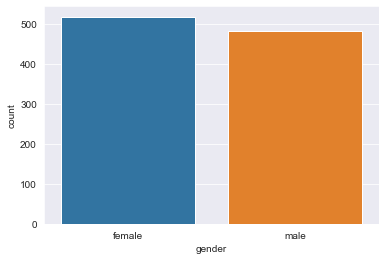

In [9]:
sns.countplot(x='gender',data=score)

This countplot shows us the number of males vs. females. There are more females present in the dataset, however, the data is fairly balanced.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

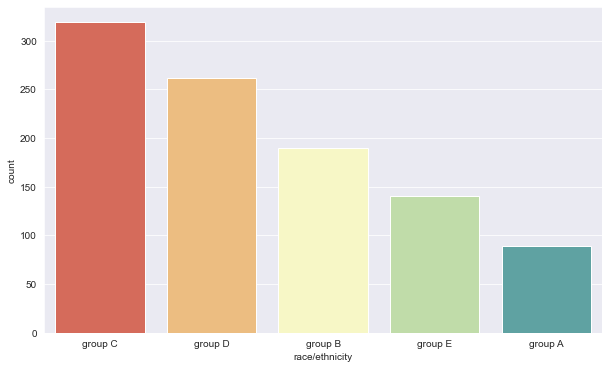

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='race/ethnicity',data=score,order = score['race/ethnicity'].value_counts().index, palette = 'Spectral')

group C is the most common race/ethnicity in the data.

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

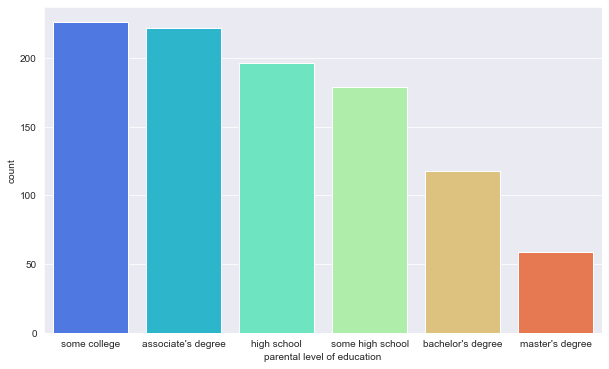

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='parental level of education',data=score,order = score['parental level of education'].value_counts().index, palette='rainbow')

Most people have either done some college or have gotten an associate's degree. Fewer people have received a higher level of education as there are fewer people with a bachelor's degree or a master's degree.

<AxesSubplot:xlabel='lunch', ylabel='count'>

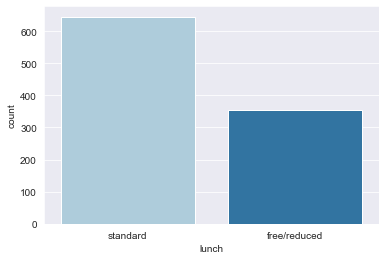

In [12]:
sns.countplot(x='lunch',data=score,order = score['lunch'].value_counts().index, palette='Paired')

Majority receive a standard lunch.

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

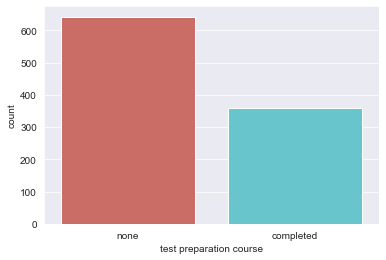

In [13]:
sns.countplot(x='test preparation course',data=score,order = score['test preparation course'].value_counts().index, palette='hls')

Most have not done the test preparation course.

/Users/anya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='writing score'>

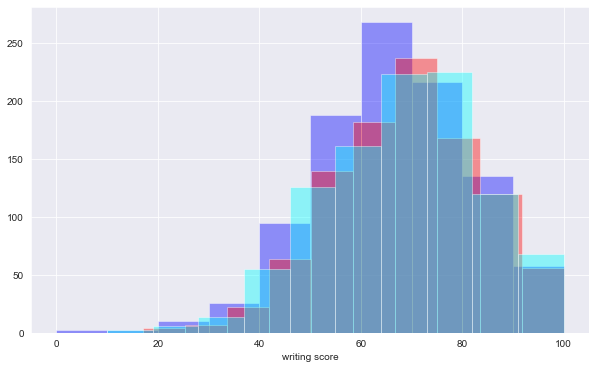

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(score['math score'],color='blue',kde=False,bins=10)
sns.distplot(score['reading score'],color='red',kde=False,bins=10)
sns.distplot(score['writing score'],color='cyan',kde=False,bins=10)

This distplot shows the distribution of the math, reading, and writing score in bins of 10. The most common
scores were between 55 - 72 for math, and 70 - 80 for reading and writing.

<AxesSubplot:xlabel='math score', ylabel='Density'>

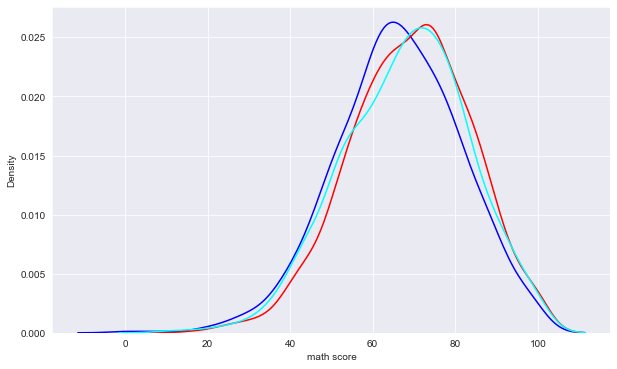

In [15]:
plt.figure(figsize=(10,6))
sns.kdeplot(score['math score'],color='blue')
sns.kdeplot(score['reading score'],color='red')
sns.kdeplot(score['writing score'],color='cyan')

This is a kde plot representing the distribution of math, reading, and writing scores.

Using the groupby function with mean, we can find the average reading, writing, and math scores based on the different features.

Also, a box plot can be used to visualize the scores based on each feature as it allows us to easily compare categories (like scores of males vs. females).

In [16]:
score['gender'].value_counts()
score.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


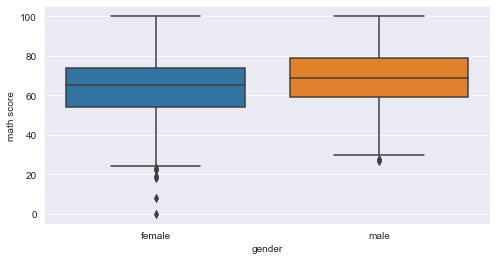

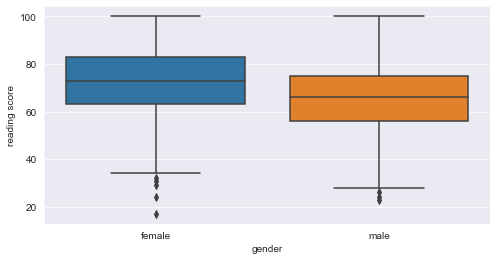

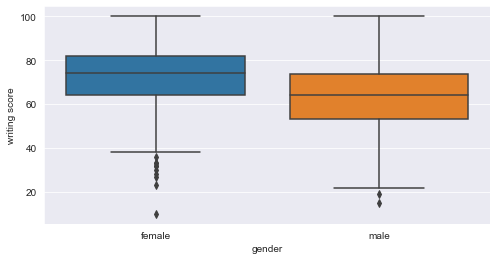

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x="gender", y="math score", data=score)
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="gender", y="reading score", data=score)
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="gender", y="writing score", data=score)
plt.show()

In [18]:
score['race/ethnicity'].value_counts()
score.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


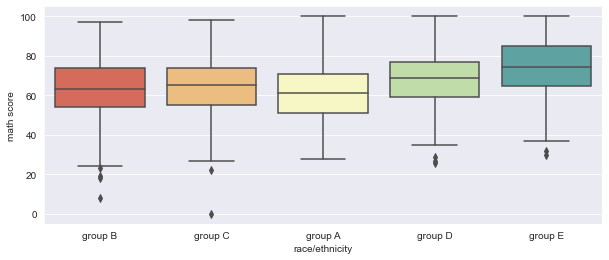

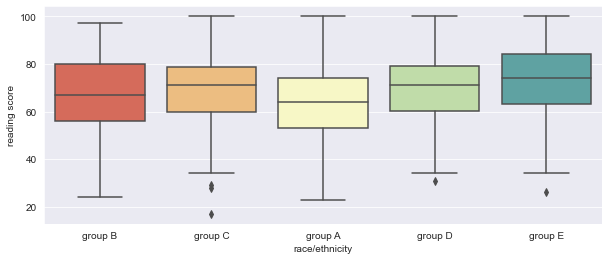

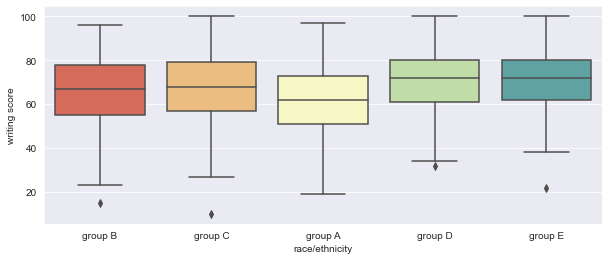

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(x="race/ethnicity", y="math score", data=score,palette='Spectral')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x="race/ethnicity", y="reading score", data=score,palette='Spectral')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x="race/ethnicity", y="writing score", data=score,palette='Spectral')
plt.show()

In [20]:
score['parental level of education'].value_counts()
score.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


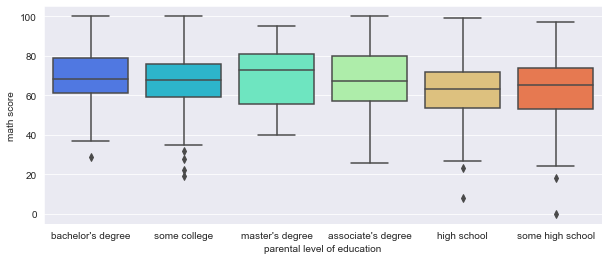

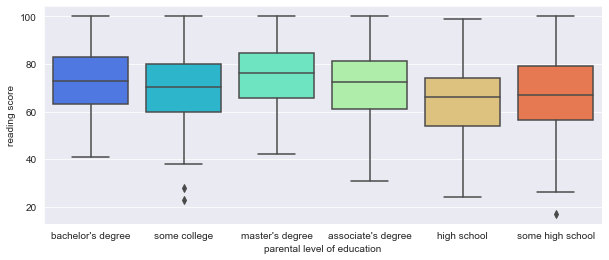

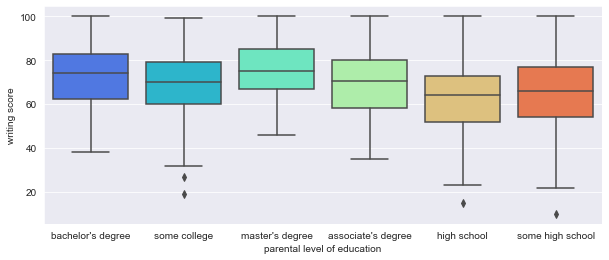

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(x="parental level of education", y="math score", data=score,palette='rainbow')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x="parental level of education", y="reading score", data=score,palette='rainbow')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x="parental level of education", y="writing score", data=score,palette='rainbow')
plt.show()

In [22]:
score['lunch'].value_counts()
score.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


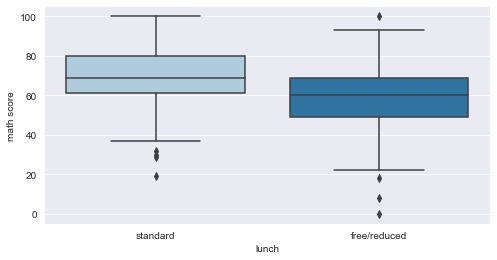

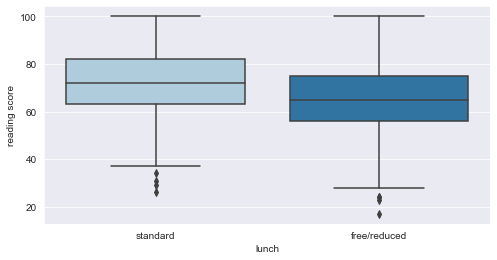

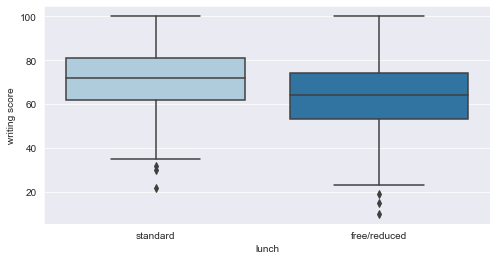

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x="lunch", y="math score", data=score,palette='Paired')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="lunch", y="reading score", data=score,palette='Paired')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="lunch", y="writing score", data=score,palette='Paired')
plt.show()

In [24]:
score['test preparation course'].value_counts()
score.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


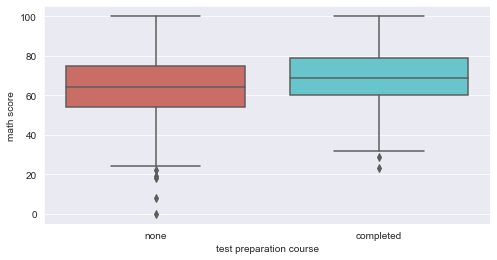

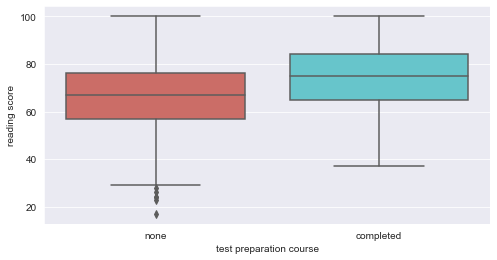

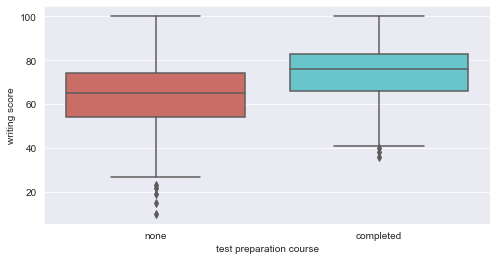

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(x="test preparation course", y="math score", data=score,palette='hls')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="test preparation course", y="reading score", data=score,palette='hls')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="test preparation course", y="writing score", data=score,palette='hls')
plt.show()

Before moving onto data preprocessing, we can create another column that contains the average overall score for each person/row. Using the mean method and setting axis = 1, we can get the average score.

In [26]:
score['average overall score'] = score.mean(axis=1)

/Users/anya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='average overall score', ylabel='Density'>

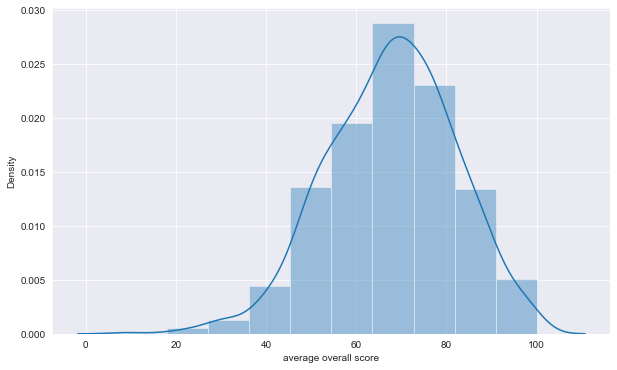

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(score['average overall score'],kde=True,bins=10)

The average overall score is about 70.

In [28]:
score.corr() 
# reading score is most correlated with overall score

,math score,reading score,writing score,average overall score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average overall score,0.918746,0.970331,0.965667,1.000000


# Data Preprocessing

In [29]:
score.isna().sum() # no null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average overall score          0
dtype: int64

In [30]:
score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


By setting categorical columns equal to a value, we can change the dataset, allowing the model to process the data.

In [31]:
gender_map = {
    'female' :    0,
    'male'   :    1
}

racethnicity_map = {
    'group A' :  0,
    'group B' :  1,
    'group C' :  2,
    'group D' :  3,
    'group E' :  4
}

parental_level_map = {
    "bachelor's degree" :  0,
    "some college" :  1,
    "master's degree" :  2,
    "associate's degree" :  3,
    "high school" :  4,
    "some high school" :  4,
}

lunch_map = {
    'standard' :    0,
    'free/reduced'   :    1
}

testprep_map = {
    'none' :    0,
    'completed'   :    1
}


In [32]:
score.loc[:,'gender'] = score['gender'].map(gender_map)
score.loc[:,'race/ethnicity'] = score['race/ethnicity'].map(racethnicity_map)
score.loc[:,'parental level of education'] = score['parental level of education'].map(parental_level_map)
score.loc[:,'lunch'] = score['lunch'].map(lunch_map)
score.loc[:,'test preparation course'] = score['test preparation course'].map(testprep_map)

In [33]:
score.head() # clean data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average overall score
0,0,1,0,0,0,72,72,74,72.666667
1,0,2,1,0,1,69,90,88,82.333333
2,0,1,2,0,0,90,95,93,92.666667
3,1,0,3,1,0,47,57,44,49.333333
4,1,2,1,0,0,76,78,75,76.333333


# Outliers

An important thing to consider are outliers in this dataset. By eliminating outliers, we can improve our model's performance. 

To remove the outliers, I looked at this [article](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer/comments ) on Kaggle. It covers methods on how to remove outliers. The method I used from the article was
the IQR method. 

In this method, multiply the IQR by 1.5. Subtract this from Q1 and add this to Q3. If there are any numbers out of the range (below Q1 - IQR * 1.5 OR Q3 + IQR * 1.5), then they are considered an outlier. 

I recommend checking out the Kaggle article as there are numerous methods on how to find and eliminate outliers from the dataset.

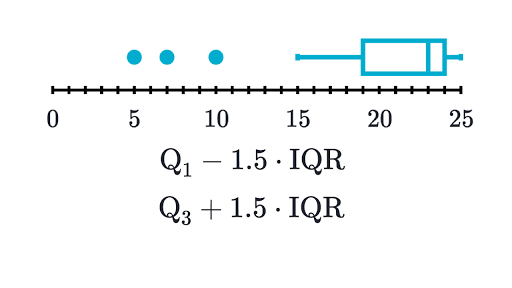

In [34]:
out=[]    
# outlier function from Kaggle article: Outlier!!! The Silent Killer
def iqr_outliers(score):
    q1 = score.quantile(0.25)
    q3 = score.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in score:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(score['math score'])

Outliers: [18, 0, 22, 24, 26, 19, 23, 8]


In [35]:
iqr_outliers(score['reading score'])

Outliers: [18, 0, 22, 24, 26, 19, 23, 8, 17, 26, 28, 23, 24, 24]


In [36]:
iqr_outliers(score['writing score'])

Outliers: [18, 0, 22, 24, 26, 19, 23, 8, 17, 26, 28, 23, 24, 24, 10, 22, 19, 15, 23]


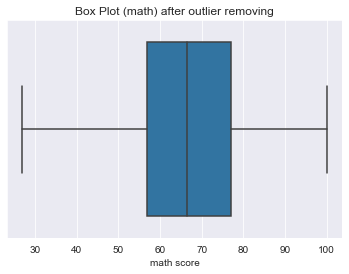

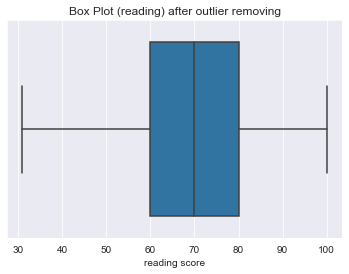

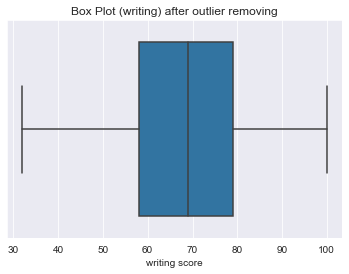

In [37]:
# code is from Kaggle article mentioned above
def drop_outliers(score, field_name):
    iqr = 1.5 * (np.percentile(score[field_name], 75) - np.percentile(score[field_name], 25))
    score.drop(score[score[field_name] > (iqr + np.percentile(score[field_name], 75))].index, inplace=True)
    score.drop(score[score[field_name] < (np.percentile(score[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(score, 'math score')
drop_outliers(score, 'reading score')
drop_outliers(score, 'writing score')

sns.boxplot(data = score, x ='math score')
plt.title("Box Plot (math) after outlier removing")
plt.show()

sns.boxplot(data = score, x = 'reading score')
plt.title("Box Plot (reading) after outlier removing")
plt.show()

sns.boxplot(data = score, x = 'writing score')
plt.title("Box Plot (writing) after outlier removing")
plt.show()

<AxesSubplot:>

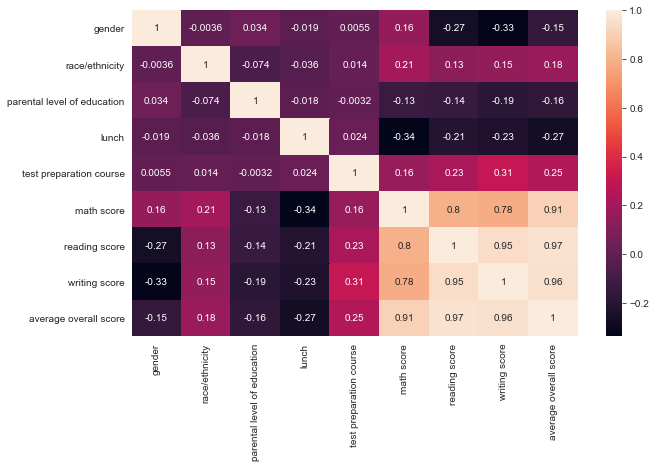

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(score.corr(),annot=True)

In [39]:
score = score.drop('lunch',axis=1)

# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
score.columns

Index(['gender', 'race/ethnicity', 'parental level of education',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average overall score'],
      dtype='object')

In [42]:
X = score[['gender', 'race/ethnicity', 'parental level of education',
       'test preparation course']]
y = score['average overall score']

In [43]:
X_2 = score.iloc[2:,:-2]
y_2 = score.iloc[2:,-2:]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=101)

In [45]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(787, 6) (787, 2) (197, 6) (197, 2)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [47]:
from sklearn import metrics
from sklearn.metrics import r2_score

# Models

## RandomForestRegressor Model

[RandomForrestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) produces the mean of the decision tree results. It is used in regression instead of classification (RandomForestClassifier) and prevents overfitting of the data. 

In [48]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [50]:
pred = rf.predict(X_test)
r2_score(y_test,pred)

0.9463181464714026

In [51]:
np.sqrt(metrics.mean_squared_error(y_test, pred)) # RMSE

3.322306340833162

In [52]:
metrics.mean_absolute_error(y_test, pred) # MAE

2.3835441543791775

In [53]:
metrics.mean_squared_error(y_test,pred) # MSE

11.037719422340235

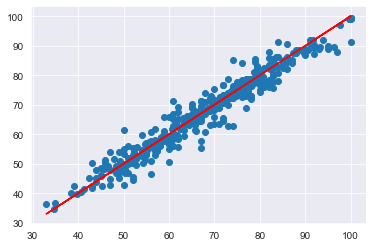

In [58]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

## Linear Regression Model

In [54]:
lr = LinearRegression(normalize=True).fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [55]:
r2_score(y_test,lr_pred_test) # r^2 score

0.9620784941757707

In [56]:
np.sqrt(metrics.mean_squared_error(y_test, lr_pred_test)) # RMSE

2.799529126612712

In [57]:
metrics.mean_absolute_error(y_test, lr_pred_test) # MAE

2.0508510594609173

In [58]:
metrics.mean_squared_error(y_test,lr_pred_test) # MSE

7.837363330752933

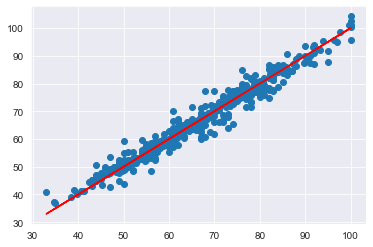

In [63]:
plt.scatter(y_test,lr_pred_test)
plt.plot(y_test,y_test,'r')

In [64]:
import pickle

In [65]:
filename = "student-score-LinR.pkl"  # save linear regression model with pickle

with open(filename, 'wb') as file:  
    pickle.dump(lr, file)

In [66]:
filename = "student-score-rf.pkl"  # save RandomForestRegressor model with pickle

with open(filename, 'wb') as file:  
    pickle.dump(rf, file)